
# **Introducción a Python para Análisis de Datos**
## Ejecicios Extra
---
**Autor:** Juan Martin Bellido  

**Descripción**  
En este notebook bonus final pondremos en práctica conceptos adquiridos a lo largo del curso para resolver un caso práctico final. 

**¿Feedback? ¿comentarios?** Por favor compártelo conmigo escribiéndome por [LinkedIn](https://www.linkedin.com/in/jmartinbellido/)  

**Material Adicional**

* [Guía Python Importar/Exportar DataFrames](https://datawizards.es/contenido/codigo-para-analisis-de-datos/guias/python-importar-exportar)
* [Comandos Jupyter Notebook](https://datawizards.es/contenido/codigo-para-analisis-de-datos/guias/comandos-rapidos-jupyter)
* [Sintaxis Markdown](https://datawizards.es/contenido/codigo-para-analisis-de-datos/guias/sintaxis-markdown)


### Ejercicio: *directores con mayor IMDB score*

Calcular la mediana de *imdb score* según director, considerar únicamente las películas producidas en USA. 

¿Cuáles son los 10 directores con mayor *imdb score*?

> https://data-wizards.s3.amazonaws.com/datasets/movies.csv

In [ ]:
# importamos librerías
import pandas as pd

In [ ]:
# importamos df
df_movies = pd.read_csv('https://data-wizards.s3.amazonaws.com/datasets/movies.csv')
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [ ]:
# resolución
df_movies[df_movies['country']=='USA']\
  .groupby('director_name')\
  .agg({'imdb_score':'median'})\
  .rename(columns={'imdb_score':'median_imdb_score'})\
  .sort_values('median_imdb_score', ascending=False)\
  .iloc[:10,:]

,median_imdb_score
director_name,
Irvin Kershner,8.80
Cary Bell,8.70
Mitchell Altieri,8.70
Mike Mayhall,8.60
Charles Chaplin,8.60
Milos Forman,8.50
Damien Chazelle,8.50
Christopher Nolan,8.50
Ron Fricke,8.50


### Ejercicio: *taxis*

La tabla de datos a continuación contiene información de viajes en taxi; entre otras variables, contiene datos de propinas en cada viaje. 

*¿Cuáles son las variables con mayor correlación con la propina ("tip")?*



> `df_taxis = sn.load_dataset('taxis')`




In [ ]:
# importamos librerías
import pandas as pd
import seaborn as sn

In [ ]:
# importamos dataframe
df_taxis = sn.load_dataset('taxis')

In [ ]:
# resolución
df_taxis.corr()['tip']\
  .reset_index()\
  .rename(columns={'index':'variable','tip':'r'})\
  .sort_values('r', ascending=False)\
  .iloc[1:,:]

,variable,r
5,total,0.646186
2,fare,0.488612
1,distance,0.452589
4,tolls,0.413619
0,passengers,0.021099


### Ejercicio: *propinas restaurant*

La tabla de datos a continuación contiene información de propinas en un restaurante.  

* Calcular el porcentaje de propina (*tip*) sobre el total de la factura (*total_bill*)
* El porcentaje de propina sobre el total de factura, ¿es mayor durante fin de semana?

> `df_tips = sn.load_dataset('tips')`


In [ ]:
# importamos librerías
import pandas as pd
import seaborn as sn
import numpy as np

In [ ]:
# importamos dataframe
df_tips = sn.load_dataset('tips')
df_tips.dtypes

In [ ]:
# creamos un nuevo campo 
df_tips['tip_share'] = round(df_tips.tip / df_tips.total_bill,2)

In [ ]:
# creamos un nuevo campo
cond = df_tips['day'].isin(['Sat','Sun'])
df_tips['is_weekend'] = np.where(cond,1,0)

In [ ]:
# agregamos datos
df_tips\
  .groupby('is_weekend')\
  .agg({'tip_share':'mean'})

,tip_share
is_weekend,
0,0.163086
1,0.159877


### Ejercicio: *MSC Cruceros*

El sector turismo fue uno de los más perjudicados durante la pandemia del COVID-19. Tomaremos como referencia *MSC Cruceros*, una de las empresas más grandes del sector. 

Construir un gráfico de serie temporal con la media semanal de cotización a la apertura de mercado (*Open*):
- Incluir datos para 2020
- Incluir una serie con datos para el año anterior (2019)
- Incluir una línea vertical en la semana 5, señalando la fecha del inicio de confinamiento en España
   
<br />

<img src="https://data-wizards.s3.amazonaws.com/img/matplotlib/msc_cruises_pandemic.png" alt="drawing" width="700"/>



In [ ]:
pip install yfinance

In [ ]:
# importamos librerías
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
%matplotlib inline

In [ ]:
# extraemos datos para Pfizer
data_msc = yf.download('MSM', start='2019-01-01', end='2020-12-31')
data_msc.dtypes

[*********************100%***********************]  1 of 1 completed


Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
# reseteamos index para incorporar indice como variable
data_msc = data_msc.reset_index()

In [ ]:
# creamos campos con componentes de fecha
data_msc['year'] = data_msc.Date.dt.year
data_msc['week'] = data_msc.Date.dt.isocalendar().week

In [ ]:
# agregamos
df = data_msc\
  .groupby(['year','week'])\
  .agg({'Open':'mean'})\
  .reset_index()\
  .rename(columns={'Open':'avg_rate'})

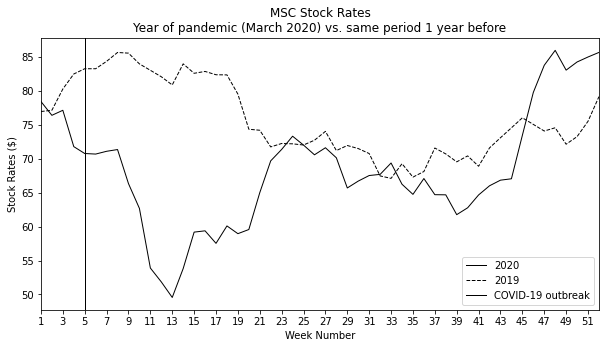

In [ ]:
# paso 1: gráfico vacío
fig, ax = plt.subplots(figsize=(10,5))

# paso 2: gráfico de serie temporal 1
cond = (df['year'] == 2020)
ax.plot(
    df[cond]['week'],
    df[cond]['avg_rate'],
    color = 'black',
    linewidth=1,
    label = '2020'
)

# paso 2: gráfico de serie temporal 1
cond = (df['year'] == 2019)
ax.plot(
    df[cond]['week'],
    df[cond]['avg_rate'],
    color = 'black',
    linewidth=1,
    label = '2019',
    linestyle='--'
)

plt.axvline(
    x= 5,
    color='black',
    linestyle='-',
    label='COVID-19 outbreak',
    linewidth=1
)

# paso 3: configuramos título y nombres de ejes 
ax.set(
    xlabel="Week Number",
    ylabel="Stock Rates ($)",
    xlim=(1,52),
    xticks=np.arange(1,52,step=2),
    title="MSC Stock Rates\nYear of pandemic (March 2020) vs. same period 1 year before"
)

ax.legend()

### Ejercicio: *PIB per cápita*

Construir dos gráficos de barra utilizando Matplotlib para visualizar la media del PIB per cápita (*Gross national income per capita*).

* Un primer gráfico de barra vertical con la media de PIB per cápita, según continente. Señalar Europa con un color diferente

* Un gráfico de barra horizontal con el PIB per cápita de cada país europeo  

> https://data-wizards.s3.amazonaws.com/datasets/dataset_na_who.csv

<img src="https://data-wizards.s3.amazonaws.com/img/matplotlib/ex_gdp_per_capita.png" alt="drawing" width="700"/>


In [ ]:
# importamos librerías
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
# importamos dataframe
df_who = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/dataset_na_who.csv")
df_who.dtypes

Country                                                    object
CountryID                                                   int64
ContinentID                                                 int64
Adolescent fertility rate (%)                             float64
Adult literacy rate (%)                                   float64
Gross national income per capita (PPP international $)    float64
Net primary school enrolment ratio female (%)             float64
Net primary school enrolment ratio male (%)               float64
Population (in thousands) total                           float64
Population annual growth rate (%)                         float64
Population in urban areas (%)                             float64
Population living below the poverty line                  float64
Continent                                                  object
dtype: object

In [ ]:
# data para gráfico 1
df = df_who.groupby('Continent')\
    .agg({'Gross national income per capita (PPP international $)':'mean'})\
    .rename(columns={'Gross national income per capita (PPP international $)':'GDP_per_capita'})\
    .sort_values('GDP_per_capita',ascending=False)\
    .reset_index()

In [ ]:
# data para gráfico 2
df_2 = df_who[df_who.Continent == 'Europe']\
    .rename(columns={'Gross national income per capita (PPP international $)':'GDP_per_capita'})\
    .sort_values('GDP_per_capita')\
    .loc[:,['Country','Continent','GDP_per_capita']]\
    .dropna()

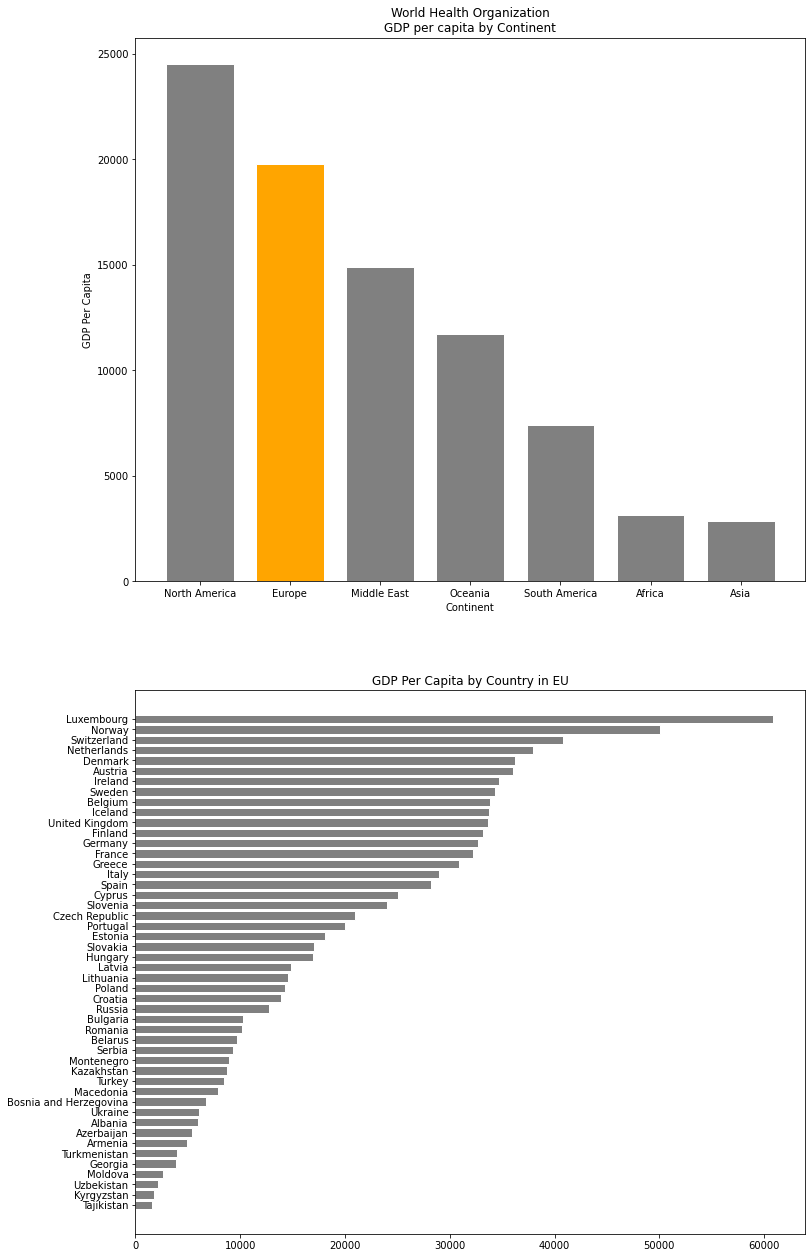

In [ ]:
fig, ax = plt.subplots(2,1,figsize = (12,22))

# chart 1
ax[0].bar(
    df['Continent'],
    df['GDP_per_capita'],
    width=0.75, 
    edgecolor="white", 
    linewidth=1,
    facecolor='grey'
)

ax[0].bar(
    df[df.Continent =='Europe']['Continent'],
    df[df.Continent =='Europe']['GDP_per_capita'],
    width=0.75, 
    edgecolor="white", 
    linewidth=1,
    facecolor='orange'
)fgi

ax[0].set(
  title="World Health Organization\nGDP per capita by Continent",
  xlabel="Continent",
  ylabel="GDP Per Capita"
)

# chart 2

ax[1].barh(
    df_2['Country'],
    df_2['GDP_per_capita'],
    edgecolor="white", 
    linewidth=1,
    facecolor='grey'
)

ax[1].set(
  title="GDP Per Capita by Country in EU"
)